In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Titanic/train.csv')

# Анализ и предобработка данных:

Посмотрим на имеющиеся данные, определим категориальные признаки и обработаем "гразные данные".


<Axes: >

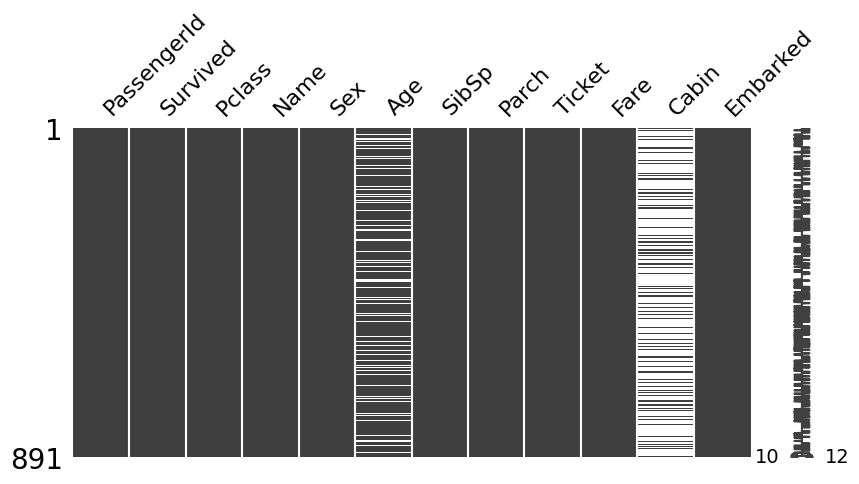

In [5]:
msno.matrix(train, figsize = (9.7,4.27))

Заметим, что признак Cabin полупойстой. По нашей гипотезе, номер кабины не является существенным и почти наверное не скажется на результат выживаемости. Поэтому этот признак было принято решение отбросить из рассмотрения итоговой выборки.

In [6]:
train.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Заметим, что в признаке возраст у нас также много пропещунных данных. Однако по нашей гипотезе возраст существенно влияет на выживаемость в катастрофе, поэтому было принято решение синтезировать пропущенные данные.

## Синтез возраста:

### Часть 1 - синтез средним:
Для синтеза возраста в качестве первой опробации было принято решение взять средний возраст всех пассажиров.

In [7]:
train1 = train.copy()

In [8]:
meanAge = round((train.Age).mean())
print("Средний возраст =", meanAge)

Средний возраст = 30


In [9]:
train1.Age[train1.Age.isnull().values] = meanAge

In [10]:
train1.to_csv('/content/drive/My Drive/Colab Notebooks/Titanic/train1_with_round.csv', index=True)

### Часть 2 - синтез средним отдельно для мужчин и для женщин:
Возьмем среднее отдельно для мужчин и отдельно для женщин и дозаполним данные по категориям.

In [11]:
train2 = train.copy()

In [12]:
meanAgeMen = round((train.Age[train.Sex.values == 'male']).mean())
print("Средний возраст мужчин =", meanAgeMen)

meanAgeWomen = round((train.Age[train.Sex.values == 'female']).mean())
print("Средний возраст женщин =", meanAgeWomen)

Средний возраст мужчин = 31
Средний возраст женщин = 28


In [13]:
train2.Age[[a*b for a,b in zip(train2.Sex.values == 'male', train2.Age.isnull().values)]] = meanAgeMen
train2.Age[[a*b for a,b in zip(train2.Sex.values == 'female', train2.Age.isnull().values)]] = meanAgeMen

In [14]:
train2.to_csv('/content/drive/My Drive/Colab Notebooks/Titanic/train2_with_round.csv', index=True)

### Часть 3 - синтез средним отдельно для мужчин и для женщин в зависимости от класса:
Возьмем среднее отдельно для мужчин и отдельно для женщин по каждому классу, так как предполагаем, что люди в разных классах будут обладать разным средним возрастом.

In [15]:
train3 = train.copy()

In [16]:
meanAgeMenC1 = round((train.Age[[a*b for a,b in zip(train3.Sex.values == 'male', train3.Pclass.values == 1)]]).mean())
print("Средний возраст мужчин в 1 классе =", meanAgeMenC1)

meanAgeWomenC1 = round((train.Age[[a*b for a,b in zip(train3.Sex.values == 'female', train3.Pclass.values == 1)]]).mean())
print("Средний возраст женщин в 1 классе =", meanAgeWomenC1)

meanAgeMenC2 = round((train.Age[[a*b for a,b in zip(train3.Sex.values == 'male', train3.Pclass.values == 2)]]).mean())
print("Средний возраст мужчин во 2 классе =", meanAgeMenC2)

meanAgeWomenC2 = round((train.Age[[a*b for a,b in zip(train3.Sex.values == 'female', train3.Pclass.values == 2)]]).mean())
print("Средний возраст женщин во 2 классе =", meanAgeWomenC2)

meanAgeMenC3 = round((train.Age[[a*b for a,b in zip(train3.Sex.values == 'male', train3.Pclass.values == 3)]]).mean())
print("Средний возраст мужчин в 3 классе =", meanAgeMenC3)

meanAgeWomenC3 = round((train.Age[[a*b for a,b in zip(train3.Sex.values == 'female', train3.Pclass.values == 3)]]).mean())
print("Средний возраст женщин в 3 классе =", meanAgeWomenC3)

Средний возраст мужчин в 1 классе = 41
Средний возраст женщин в 1 классе = 35
Средний возраст мужчин во 2 классе = 31
Средний возраст женщин во 2 классе = 29
Средний возраст мужчин в 3 классе = 27
Средний возраст женщин в 3 классе = 22


In [17]:
train3.Age[[a*b*c for a,b,c in zip(train3.Sex.values == 'male', train3.Age.isnull().values, train3.Pclass.values == 1)]] = meanAgeMenC1
train3.Age[[a*b*c for a,b,c in zip(train3.Sex.values == 'female', train3.Age.isnull().values, train3.Pclass.values == 1)]] = meanAgeWomenC1

train3.Age[[a*b*c for a,b,c in zip(train3.Sex.values == 'male', train3.Age.isnull().values, train3.Pclass.values == 2)]] = meanAgeMenC2
train3.Age[[a*b*c for a,b,c in zip(train3.Sex.values == 'female', train3.Age.isnull().values, train3.Pclass.values == 2)]] = meanAgeWomenC2

train3.Age[[a*b*c for a,b,c in zip(train3.Sex.values == 'male', train3.Age.isnull().values, train3.Pclass.values == 3)]] = meanAgeMenC3
train3.Age[[a*b*c for a,b,c in zip(train3.Sex.values == 'female', train3.Age.isnull().values, train3.Pclass.values == 3)]] = meanAgeWomenC3

In [18]:
train3.to_csv('/content/drive/My Drive/Colab Notebooks/Titanic/train3_with_round.csv', index=True)

## Анализ данных:

В тренировочной выборке нам представлены следующие признаки:
1.   Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);
2.   Name — имя;
3.   Sex — пол;
4.   Age — возраст;
5.   SibSp — горизонтальные родственные связи(братья/сестры, супруги);
6.   Parch — вертикальные родственные связи(родители-дети);
7.   Ticket — номер билета;
8.   Fare — плата за проезд;
9.   Cabin — каюта;
10.  Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

По нашему предположению имя пассажира, номер билета и порт посадки не будут влиять на выживаемость. Отдельно рассмотрим учет/неучет вертикальных и горизонтальных связей.


In [19]:
train.pop('Embarked')
train.pop('Name')
train.pop('SibSp')
train.pop('Parch')
train.pop('Ticket')

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

Построим зависимость выживаемости от пола пассажира и от его класса.

In [20]:
sns.color_palette("RdBu", 16)

[(0.5769319492502883, 0.05536332179930796, 0.14925028835063436),
 (0.7229527104959631, 0.14394463667820068, 0.19215686274509805),
 (0.805997693194925, 0.3100346020761245, 0.2705882352941176),
 (0.8807381776239908, 0.4719723183391003, 0.3753171856978085),
 (0.9499423298731257, 0.6311418685121106, 0.49757785467128013),
 (0.9755478662053056, 0.7591695501730102, 0.6530565167243365),
 (0.9893886966551326, 0.8717416378316032, 0.8025374855824683),
 (0.9755478662053056, 0.9363321799307959, 0.9132641291810842),
 (0.92479815455594, 0.9478662053056517, 0.960553633217993),
 (0.8371395617070359, 0.9063437139561707, 0.9444059976931949),
 (0.7033448673587084, 0.8389850057670128, 0.9079584775086506),
 (0.5543252595155715, 0.7610149942329878, 0.8643598615916958),
 (0.37208765859284904, 0.6456747404844292, 0.8020761245674741),
 (0.23137254901960785, 0.5349480968858131, 0.7434832756632064),
 (0.15294117647058825, 0.4311418685121108, 0.6904267589388697),
 (0.08419838523644753, 0.31280276816609, 0.5534025374855824)]

In [21]:
palette = sns.color_palette("RdBu", 16)

In [22]:
sns.set(rc={'figure.figsize':(9.7,4.27)})

[Text(0, 0.5, 'Survival rate'),
 Text(0.5, 1.0, 'Survival rate among men and women')]

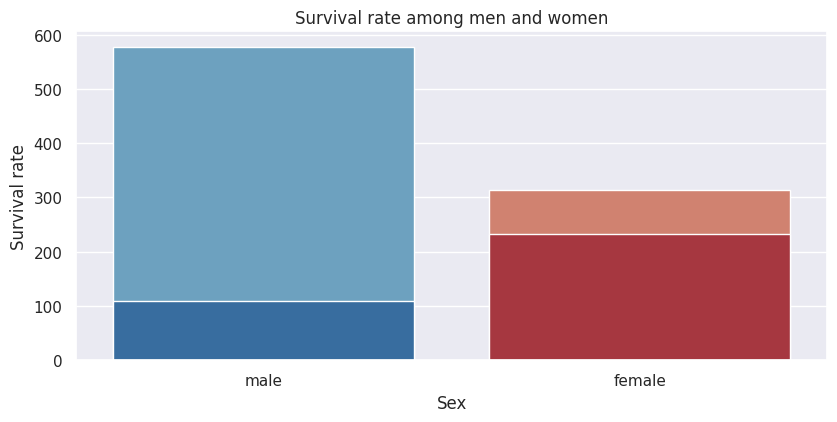

In [23]:
ax = plt.subplots()

cols1 = [palette[3] if x == 'female' else palette[12] for x in train.Sex]
cols2 = [palette[1] if x == 'female' else palette[14] for x in train.Sex]
ax = sns.countplot(data = train, x=train.Sex, order = ['male', 'female'], palette = cols1)
ax = sns.countplot(data = train, x=train.Sex[train.Survived.values == 1], order = ['male', 'female'], palette = cols2)
ax.set(ylabel="Survival rate", title= "Survival rate among men and women")

Text(0.5, 0.98, 'Survival rate among men and women compared by class')

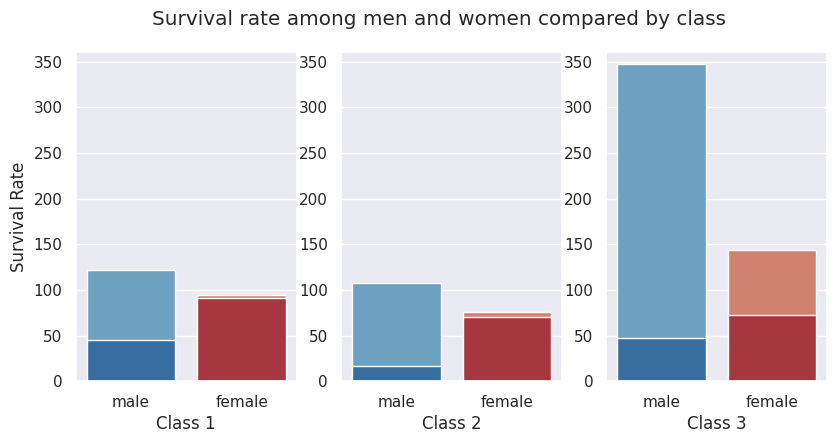

In [24]:
fig, axes = plt.subplots(1, 3)

cols1 = [palette[3] if x == 'female' else palette[12] for x in train.Sex]
cols2 = [palette[1] if x == 'female' else palette[14] for x in train.Sex]

sns.countplot(data = train, x=train.Sex[train.Pclass.values == 1], order = ['male', 'female'], palette = cols1, ax=axes[0])
sns.countplot(data = train, x=train.Sex[train.Pclass.values == 2], order = ['male', 'female'], palette = cols1, ax=axes[1])
sns.countplot(data = train, x=train.Sex[train.Pclass.values == 3], order = ['male', 'female'], palette = cols1, ax=axes[2])

sns.countplot(data = train, x=train.Sex[[a*b for a, b in zip(train.Pclass.values == 1, train.Survived.values == 1)]], order = ['male', 'female'], palette = cols2, ax=axes[0])
sns.countplot(data = train, x=train.Sex[[a*b for a, b in zip(train.Pclass.values == 2, train.Survived.values == 1)]], order = ['male', 'female'], palette = cols2, ax=axes[1])
sns.countplot(data = train, x=train.Sex[[a*b for a, b in zip(train.Pclass.values == 3, train.Survived.values == 1)]], order = ['male', 'female'], palette = cols2, ax=axes[2])

axes[0].set(ylim=(0, 360))
axes[1].set(ylim=(0, 360))
axes[2].set(ylim=(0, 360))

axes[0].set(xlabel = "Class 1", ylabel="Survival Rate")
axes[1].set(xlabel = "Class 2", ylabel="")
axes[2].set(xlabel = "Class 3", ylabel="")
fig.suptitle('Survival rate among men and women compared by class')

Можем наблюдать, что женщин выжило больше, чем мужчин. Также заметим, что чем выше класс билета, тем больше был шанс на выживание. Можно сделать предположение, что чем выше цена билета, тем больше шанс на выживание.

Оценим среднюю цену билетов для мужчин и женщин.



In [25]:
meanTicketPriceWomen = (train.Fare[train.Sex.values == 'female']).mean()
print("Средняя цена билетов для женщин =", meanTicketPriceWomen);

Средняя цена билетов для женщин = 44.47981783439491


In [26]:
meanTicketPriceMen = (train.Fare[train.Sex.values == 'male']).mean()
print("Средняя цена билетов для мужчин =", meanTicketPriceMen);

Средняя цена билетов для мужчин = 25.523893414211443


Заметим, что средняя цена женского билета больше, чем мужского. Однако, как видно из графиков, мужчины и женщины распределены по классам не одинаково, а значит это могло повлиять на среднюю стоимость. Проверим среднюю цену для каждого класса отдельно.

In [27]:
meanTicketPriceWomenClass1 = (train.Fare[[a*b for a, b in zip(train.Pclass.values == 1, train.Sex.values == 'female')]]).mean()
print("Средняя цена билетов для женщин в 1 классе =", meanTicketPriceWomenClass1)

Средняя цена билетов для женщин в 1 классе = 106.12579787234043


In [28]:
meanTicketPriceMenClass1 = (train.Fare[[a*b for a, b in zip(train.Pclass.values == 1, train.Sex.values == 'male')]]).mean()
print("Средняя цена билетов для мужчин в 1 классе =", meanTicketPriceMenClass1)

Средняя цена билетов для мужчин в 1 классе = 67.22612704918032


Данные показывают, что средняя цена в первом классе значительно отличаются для женщин и мужчин. Проверим остальные классы.

In [29]:
meanTicketPriceWomenClass2 = (train.Fare[[a*b for a, b in zip(train.Pclass.values == 2, train.Sex.values == 'female')]]).mean()
print("Средняя цена билетов для женщин в 2 классе =", meanTicketPriceWomenClass2)

Средняя цена билетов для женщин в 2 классе = 21.97012105263158


In [30]:
meanTicketPriceMenClass2 = (train.Fare[[a*b for a, b in zip(train.Pclass.values == 2, train.Sex.values == 'male')]]).mean()
print("Средняя цена билетов для мужчин в 2 классе =", meanTicketPriceMenClass2)

Средняя цена билетов для мужчин в 2 классе = 19.74178240740741


In [31]:
meanTicketPriceWomenClass3 = (train.Fare[[a*b for a, b in zip(train.Pclass.values == 3, train.Sex.values == 'female')]]).mean()
print("Средняя цена билетов для женщин в 3 классе =", meanTicketPriceWomenClass3)

Средняя цена билетов для женщин в 3 классе = 16.118809722222224


In [32]:
meanTicketPriceMenClass3 = (train.Fare[[a*b for a, b in zip(train.Pclass.values == 3, train.Sex.values == 'male')]]).mean()
print("Средняя цена билетов для мужчин в 3 классе =", meanTicketPriceMenClass3)

Средняя цена билетов для мужчин в 3 классе = 12.661632564841499


Таким образом видим, что женский билет стоил дороже мужского. По нашему изначальному предположению, женщин и детей спасали в первую очередь. Это означает, что признак цены билета зависит не только от класса, но и от пола пассажира. Избегая зависимости признаков, исключим его из модели данных.

In [33]:
train.pop('Fare')

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [34]:
#mean_child_age = round((trainFull.Age[trainFull.Age < 18]).mean())
#mean_child_age

In [35]:
#mean_adult_age = round((trainFull.Age[trainFull.Age >= 18]).mean())
#mean_adult_age

In [36]:
# Идея признана нецелесообразной
'''surnames = dict([])
for i in range (len(trainFull.Age)):
    if (trainFull.Parch[i]):
        surname = trainFull.Name[i][:trainFull.Name[i].find(',')]
        surnames[surname] = []
for i in range (len(trainFull.Age)):
    if (trainFull.Parch[i]):
        surname = trainFull.Name[i][:trainFull.Name[i].find(',')]
        surnames[surname].append(i)

for key in surnames:
    for j in surnames[key]:
        print(key)
        print(surnames[key])
        if (pd.isnull(trainFull.Age[j]) == False):
            if (trainFull.Age[j] < 18):
                print("got a child")
        else:
            print("got null")'''


'surnames = dict([])\nfor i in range (len(trainFull.Age)):\n    if (trainFull.Parch[i]):\n        surname = trainFull.Name[i][:trainFull.Name[i].find(\',\')]\n        surnames[surname] = []\nfor i in range (len(trainFull.Age)):\n    if (trainFull.Parch[i]):\n        surname = trainFull.Name[i][:trainFull.Name[i].find(\',\')]\n        surnames[surname].append(i)\n\nfor key in surnames:\n    for j in surnames[key]:\n        print(key)\n        print(surnames[key])\n        if (pd.isnull(trainFull.Age[j]) == False):\n            if (trainFull.Age[j] < 18):\n                print("got a child")\n        else:\n            print("got null")'

Исходя из анализа выше, оценка выживаемости пассажира будет рассматриваться по трем признака - класс, возраст и пол пассажира(ки).

# Обучение моделей

## Предобработка

In [37]:
target_col = ['Survived']
train_col  = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']

In [38]:
X_1 = train1[train_col]
Y_1 = train1[target_col]

X_2 = train2[train_col]
Y_2 = train2[target_col]

X_3 = train3[train_col]
Y_3 = train3[target_col]

In [39]:
d = {'male': 0, 'female': 1}
X_1['Sex'] = X_1['Sex'].apply(lambda x:d[x])
X_2['Sex'] = X_2['Sex'].apply(lambda x:d[x])
X_3['Sex'] = X_3['Sex'].apply(lambda x:d[x])

## Обучение без маштабирования

In [40]:
from sklearn.model_selection import train_test_split

X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1, Y_1, test_size=0.33, random_state=42)
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, test_size=0.33, random_state=42)
X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X_3, Y_3, test_size=0.33, random_state=42)

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def print_conf_matrix(Y_1, Y_2, Y_3, Y_1_pred, Y_2_pred, Y_3_pred):
    conf_matr_1 = confusion_matrix(Y_1, Y_1_pred)
    conf_matr_2 = confusion_matrix(Y_2, Y_2_pred)
    conf_matr_3 = confusion_matrix(Y_3, Y_3_pred)
    disp_1 = ConfusionMatrixDisplay(confusion_matrix=conf_matr_1)
    disp_2 = ConfusionMatrixDisplay(confusion_matrix=conf_matr_2)
    disp_3 = ConfusionMatrixDisplay(confusion_matrix=conf_matr_3)

    f, ax = plt.subplots(1, 3)
    f.set_size_inches(14,4)
    disp_1.plot(ax=ax[0], cmap=plt.cm.Blues)
    disp_2.plot(ax=ax[1], cmap=plt.cm.Blues)
    disp_3.plot(ax=ax[2], cmap=plt.cm.Blues)

    ax[0].set_title('Mean')
    ax[1].set_title('Mean for male/female')
    ax[2].set_title('Mean for male/female by class')
    ax[0].grid()
    ax[1].grid()
    ax[2].grid()

    plt.show()

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

def print_score(model, Y_1, Y_2, Y_3, Y_1_pred, Y_2_pred, Y_3_pred):
    print('Mean')
    print(model, 'Accuracy: ', accuracy_score(Y_1, Y_1_pred))
    print(model, 'Precision:', precision_score(Y_1, Y_1_pred))
    print(model, 'Recall:   ', recall_score(Y_1, Y_1_pred))
    print(model, 'ROC AUC:  ', roc_auc_score(Y_1, Y_1_pred))
    print(model, 'LogLoss:  ', log_loss(Y_1, Y_1_pred))

    print('\nMean for male/female')
    print(model, 'Accuracy: ', accuracy_score(Y_2, Y_2_pred))
    print(model, 'Precision:', precision_score(Y_2, Y_2_pred))
    print(model, 'Recall:   ', recall_score(Y_2, Y_2_pred))
    print(model, 'ROC AUC:  ', roc_auc_score(Y_2, Y_2_pred))
    print(model, 'LogLoss:  ', log_loss(Y_2, Y_2_pred))

    print('\nMean for male/female by class')
    print(model, 'Accuracy: ', accuracy_score(Y_3, Y_3_pred))
    print(model, 'Precision:', precision_score(Y_3, Y_3_pred))
    print(model, 'Recall:   ', recall_score(Y_3, Y_3_pred))
    print(model, 'ROC AUC:  ', roc_auc_score(Y_3, Y_3_pred))
    print(model, 'LogLoss:  ', log_loss(Y_3, Y_3_pred))

### Метод опорных векторов

In [43]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

model_svm_1 = GridSearchCV(svm.LinearSVC(), param_grid)
model_svm_2 = GridSearchCV(svm.LinearSVC(), param_grid)
model_svm_3 = GridSearchCV(svm.LinearSVC(), param_grid)

model_svm_1.fit(X_1_train, Y_1_train.values.ravel())
model_svm_2.fit(X_2_train, Y_2_train.values.ravel())
model_svm_3.fit(X_3_train, Y_3_train.values.ravel())

print('Best params for model 1: ', model_svm_1.best_params_)
print('Best params for model 2: ', model_svm_2.best_params_)
print('Best params for model 3: ', model_svm_3.best_params_)


Best params for model 1:  {'C': 1, 'penalty': 'l2'}
Best params for model 2:  {'C': 1, 'penalty': 'l2'}
Best params for model 3:  {'C': 1, 'penalty': 'l2'}


In [44]:
C_svm_1 = model_svm_1.best_params_['C']
penalty_svm_1 = model_svm_1.best_params_['penalty']

C_svm_2 = model_svm_2.best_params_['C']
penalty_svm_2 = model_svm_2.best_params_['penalty']

C_svm_3 = model_svm_3.best_params_['C']
penalty_svm_3 = model_svm_3.best_params_['penalty']

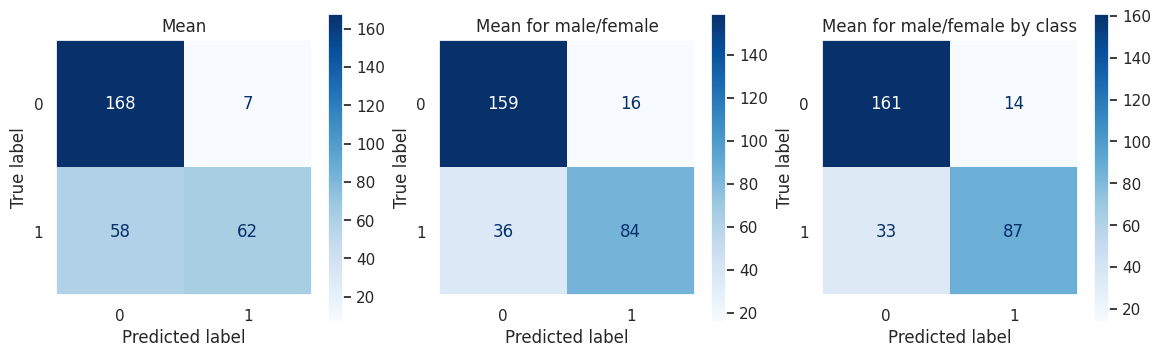

In [45]:
Y_1_pred_svm = model_svm_1.predict(X_1_test)
Y_2_pred_svm = model_svm_2.predict(X_2_test)
Y_3_pred_svm = model_svm_3.predict(X_3_test)

print_conf_matrix(Y_1_test, Y_2_test, Y_3_test, Y_1_pred_svm, Y_2_pred_svm, Y_3_pred_svm)

In [46]:
print_score('SVM', Y_1_test, Y_2_test, Y_3_test, Y_1_pred_svm, Y_2_pred_svm, Y_3_pred_svm)

Mean
SVM Accuracy:  0.7796610169491526
SVM Precision: 0.8985507246376812
SVM Recall:    0.5166666666666667
SVM ROC AUC:   0.7383333333333333
SVM LogLoss:   7.941821933195304

Mean for male/female
SVM Accuracy:  0.823728813559322
SVM Precision: 0.84
SVM Recall:    0.7
SVM ROC AUC:   0.8042857142857143
SVM LogLoss:   6.3534575465562435

Mean for male/female by class
SVM Accuracy:  0.8406779661016949
SVM Precision: 0.8613861386138614
SVM Recall:    0.725
SVM ROC AUC:   0.8225000000000001
SVM LogLoss:   5.742548167079682


### Логистическая регрессия

In [47]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'tol': [0.0001, 0.00001, 0.000001]}

model_lr_1 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)
model_lr_2 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)
model_lr_3 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)

model_lr_1.fit(X_1_train, Y_1_train.values.ravel())
model_lr_2.fit(X_2_train, Y_2_train.values.ravel())
model_lr_3.fit(X_3_train, Y_3_train.values.ravel())

print('Best params for model 1: ', model_lr_1.best_params_)
print('Best params for model 2: ', model_lr_2.best_params_)
print('Best params for model 3: ', model_lr_3.best_params_)

Best params for model 1:  {'C': 1, 'penalty': 'l2', 'tol': 0.0001}
Best params for model 2:  {'C': 1, 'penalty': 'l2', 'tol': 0.0001}
Best params for model 3:  {'C': 10, 'penalty': 'l2', 'tol': 0.0001}


In [48]:
C_lr_1 = model_lr_1.best_params_['C']
penalty_lr_1 = model_lr_1.best_params_['penalty']
tol_lr_1 = model_lr_1.best_params_['tol']

C_lr_2 = model_lr_2.best_params_['C']
penalty_lr_2 = model_lr_2.best_params_['penalty']
tol_lr_2 = model_lr_2.best_params_['tol']

C_lr_3 = model_lr_3.best_params_['C']
penalty_lr_3 = model_lr_3.best_params_['penalty']
tol_lr_3 = model_lr_3.best_params_['tol']

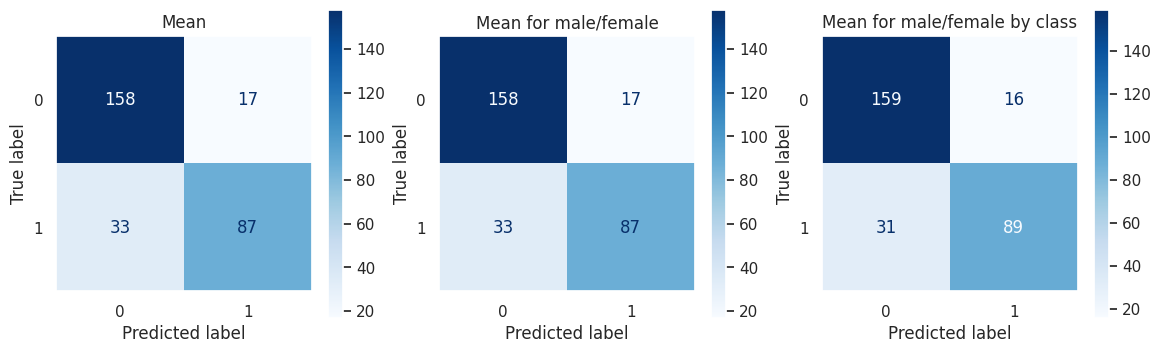

In [49]:
Y_1_pred_lr = model_lr_1.predict(X_1_test)
Y_2_pred_lr = model_lr_2.predict(X_2_test)
Y_3_pred_lr = model_lr_3.predict(X_3_test)

print_conf_matrix(Y_1_test, Y_2_test, Y_3_test, Y_1_pred_lr, Y_2_pred_lr, Y_3_pred_lr)

In [50]:
print_score('Logistic Regression', Y_1_test, Y_2_test, Y_3_test, Y_1_pred_lr, Y_2_pred_lr, Y_3_pred_lr)

Mean
Logistic Regression Accuracy:  0.8305084745762712
Logistic Regression Precision: 0.8365384615384616
Logistic Regression Recall:    0.725
Logistic Regression ROC AUC:   0.8139285714285714
Logistic Regression LogLoss:   6.109093794765619

Mean for male/female
Logistic Regression Accuracy:  0.8305084745762712
Logistic Regression Precision: 0.8365384615384616
Logistic Regression Recall:    0.725
Logistic Regression ROC AUC:   0.8139285714285714
Logistic Regression LogLoss:   6.109093794765619

Mean for male/female by class
Logistic Regression Accuracy:  0.8406779661016949
Logistic Regression Precision: 0.8476190476190476
Logistic Regression Recall:    0.7416666666666667
Logistic Regression ROC AUC:   0.8251190476190476
Logistic Regression LogLoss:   5.742548167079682


### Метод k ближайших соседей

In [51]:
from sklearn.neighbors import KNeighborsClassifier


from sklearn.linear_model import LogisticRegression

param_grid = {'n_neighbors': [6, 7, 8, 9],
              'metric': ['minkowski', 'chebyshev', 'cosine'],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

model_knn_1 = GridSearchCV(KNeighborsClassifier(), param_grid)
model_knn_2 = GridSearchCV(KNeighborsClassifier(), param_grid)
model_knn_3 = GridSearchCV(KNeighborsClassifier(), param_grid)

model_knn_1.fit(X_1_train, Y_1_train.values.ravel())
model_knn_2.fit(X_2_train, Y_2_train.values.ravel())
model_knn_3.fit(X_3_train, Y_3_train.values.ravel())

print('Best params for model 1: ', model_knn_1.best_params_)
print('Best params for model 2: ', model_knn_2.best_params_)
print('Best params for model 3: ', model_knn_3.best_params_)

Best params for model 1:  {'metric': 'minkowski', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Best params for model 2:  {'metric': 'minkowski', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
Best params for model 3:  {'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [52]:
neighb_knn_1 = model_knn_1.best_params_['n_neighbors']
metric_knn_1 = model_knn_1.best_params_['metric']
weights_knn_1 = model_knn_1.best_params_['weights']
p_knn_1 = model_knn_1.best_params_['p']

neighb_knn_2 = model_knn_2.best_params_['n_neighbors']
metric_knn_2 = model_knn_2.best_params_['metric']
weights_knn_2 = model_knn_2.best_params_['weights']
p_knn_2 = model_knn_2.best_params_['p']

neighb_knn_3 = model_knn_3.best_params_['n_neighbors']
metric_knn_3 = model_knn_3.best_params_['metric']
weights_knn_3 = model_knn_3.best_params_['weights']
p_knn_3 = model_knn_3.best_params_['p']

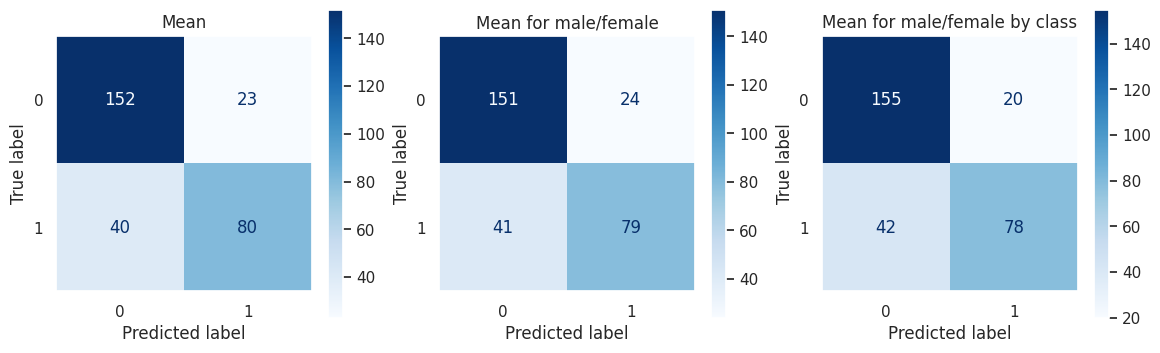

In [53]:
Y_1_pred_knn = model_knn_1.predict(X_1_test)
Y_2_pred_knn = model_knn_2.predict(X_2_test)
Y_3_pred_knn = model_knn_3.predict(X_3_test)

print_conf_matrix(Y_1_test, Y_2_test, Y_3_test, Y_1_pred_knn, Y_2_pred_knn, Y_3_pred_knn)

In [54]:
print_score('KNN', Y_1_test, Y_2_test, Y_3_test, Y_1_pred_knn, Y_2_pred_knn, Y_3_pred_knn)

Mean
KNN Accuracy:  0.7864406779661017
KNN Precision: 0.7766990291262136
KNN Recall:    0.6666666666666666
KNN ROC AUC:   0.7676190476190475
KNN LogLoss:   7.697458181404681

Mean for male/female
KNN Accuracy:  0.7796610169491526
KNN Precision: 0.7669902912621359
KNN Recall:    0.6583333333333333
KNN ROC AUC:   0.7605952380952381
KNN LogLoss:   7.941821933195304

Mean for male/female by class
KNN Accuracy:  0.7898305084745763
KNN Precision: 0.7959183673469388
KNN Recall:    0.65
KNN ROC AUC:   0.7678571428571428
KNN LogLoss:   7.575276305509369


### Сравнение моделей

In [55]:
import math

def iter_accuracy_graph(gr_title=None, svm_accuracy=[], lr_accuracy=[], knn_accuracy=[]):
    plt.figure(figsize=(5,4))
    plt.title(gr_title, fontsize=10)

    iter = [i for i in range(N)]
    plt.plot(iter, svm_accuracy, marker='o', color='c', label='svm')
    plt.plot(iter, lr_accuracy , marker='o', color='b', label='lr' )
    plt.plot(iter, knn_accuracy, marker='o', color='gray', label='knn' )

    plt.grid(True)
    plt.xticks([i for i in range(N)])
    plt.yticks([0.1 * i for i in range(5, 11)])

    plt.ylabel('accuracy',  fontsize=12)
    plt.xlabel('iteration',  fontsize=12)

    plt.legend(fontsize=10)

    plt.show()

In [56]:
svm_accuracy_score = []
lr_accuracy_score  = []
knn_accuracy_score = []

N = 10

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y_1.values.ravel(), test_size=0.33, random_state=42)
    model = svm.LinearSVC(C=C_svm_1, penalty=penalty_svm_1)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    svm_accuracy_score.append(accuracy_score(Y_test, Y_pred))
    model = LogisticRegression(C=C_lr_1, penalty=penalty_lr_1, tol=tol_lr_1)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    lr_accuracy_score.append(accuracy_score(Y_test, Y_pred))
    model = KNeighborsClassifier(n_neighbors=neighb_knn_1, metric=metric_knn_1, weights=weights_knn_1, p=p_knn_1)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    knn_accuracy_score.append(accuracy_score(Y_test, Y_pred))

print(svm_accuracy_score)
print(lr_accuracy_score)
print(knn_accuracy_score)

[0.8169491525423729, 0.7830508474576271, 0.8271186440677966, 0.7084745762711865, 0.8271186440677966, 0.8169491525423729, 0.7762711864406779, 0.8271186440677966, 0.5254237288135594, 0.4406779661016949]
[0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712]
[0.7864406779661017, 0.7864406779661017, 0.7864406779661017, 0.7864406779661017, 0.7864406779661017, 0.7864406779661017, 0.7864406779661017, 0.7864406779661017, 0.7864406779661017, 0.7864406779661017]


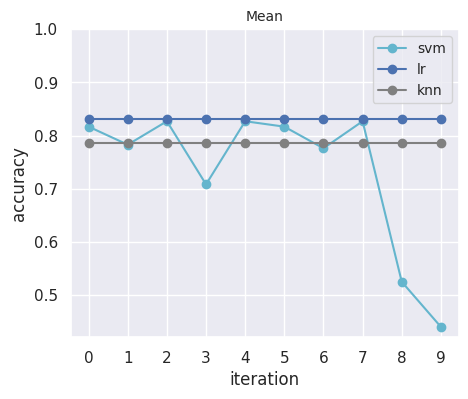

In [57]:
iter_accuracy_graph('Mean', svm_accuracy_score, lr_accuracy_score, knn_accuracy_score)

In [58]:
svm_accuracy_score = []
lr_accuracy_score  = []
knn_accuracy_score = []

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2.values.ravel(), test_size=0.33, random_state=42)
    model = svm.LinearSVC(C=C_svm_2, penalty=penalty_svm_2)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    svm_accuracy_score.append(accuracy_score(Y_test, Y_pred))
    model = LogisticRegression(C=C_lr_2, penalty=penalty_lr_2, tol=tol_lr_2)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    lr_accuracy_score.append(accuracy_score(Y_test, Y_pred))
    model = KNeighborsClassifier(n_neighbors=neighb_knn_2, metric=metric_knn_2, weights=weights_knn_2, p=p_knn_2)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    knn_accuracy_score.append(accuracy_score(Y_test, Y_pred))

print(svm_accuracy_score)
print(lr_accuracy_score)
print(knn_accuracy_score)

[0.8033898305084746, 0.4406779661016949, 0.6745762711864407, 0.7084745762711865, 0.7627118644067796, 0.7796610169491526, 0.7423728813559322, 0.6813559322033899, 0.7898305084745763, 0.8271186440677966]
[0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712]
[0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526, 0.7796610169491526]


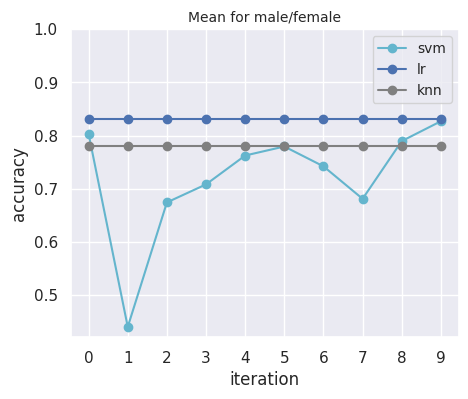

In [59]:
iter_accuracy_graph('Mean for male/female', svm_accuracy_score, lr_accuracy_score, knn_accuracy_score)

In [60]:
svm_accuracy_score = []
lr_accuracy_score  = []
knn_accuracy_score = []

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split(X_3, Y_3.values.ravel(), test_size=0.33, random_state=42)
    model = svm.LinearSVC(C=C_svm_3, penalty=penalty_svm_3)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    svm_accuracy_score.append(accuracy_score(Y_test, Y_pred))
    model = LogisticRegression(C=C_lr_3, penalty=penalty_lr_3, tol=tol_lr_3)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    lr_accuracy_score.append(accuracy_score(Y_test, Y_pred))
    model = KNeighborsClassifier(n_neighbors=neighb_knn_3, metric=metric_knn_3, weights=weights_knn_3, p=p_knn_3)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    knn_accuracy_score.append(accuracy_score(Y_test, Y_pred))

print(svm_accuracy_score)
print(lr_accuracy_score)
print(knn_accuracy_score)

[0.8169491525423729, 0.7593220338983051, 0.7457627118644068, 0.8406779661016949, 0.6949152542372882, 0.8406779661016949, 0.8406779661016949, 0.7186440677966102, 0.8271186440677966, 0.8033898305084746]
[0.8406779661016949, 0.8406779661016949, 0.8406779661016949, 0.8406779661016949, 0.8406779661016949, 0.8406779661016949, 0.8406779661016949, 0.8406779661016949, 0.8406779661016949, 0.8406779661016949]
[0.7898305084745763, 0.7898305084745763, 0.7898305084745763, 0.7898305084745763, 0.7898305084745763, 0.7898305084745763, 0.7898305084745763, 0.7898305084745763, 0.7898305084745763, 0.7898305084745763]


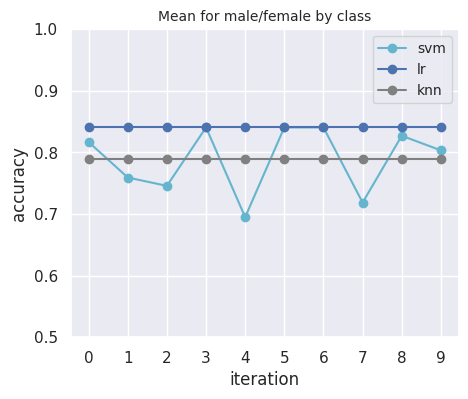

In [61]:
iter_accuracy_graph('Mean for male/female by class', svm_accuracy_score, lr_accuracy_score, knn_accuracy_score)

## Отмаштабированные данные

In [62]:
X_1 = train1[train_col]
Y_1 = train1[target_col]

X_2 = train2[train_col]
Y_2 = train2[target_col]

X_3 = train3[train_col]
Y_3 = train3[target_col]

In [63]:
d = {'male': 0, 'female': 1}
X_1['Sex'] = X_1['Sex'].apply(lambda x:d[x])
X_2['Sex'] = X_2['Sex'].apply(lambda x:d[x])
X_3['Sex'] = X_3['Sex'].apply(lambda x:d[x])

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_1 = scaler.fit_transform(X_1)
X_2 = scaler.fit_transform(X_2)
X_3 = scaler.fit_transform(X_3)

In [65]:
from sklearn.model_selection import train_test_split

X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1, Y_1, test_size=0.33, random_state=42)
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, test_size=0.33, random_state=42)
X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X_3, Y_3, test_size=0.33, random_state=42)

### Метод опорных векторов

In [66]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

model_svm_1 = GridSearchCV(svm.LinearSVC(), param_grid)
model_svm_2 = GridSearchCV(svm.LinearSVC(), param_grid)
model_svm_3 = GridSearchCV(svm.LinearSVC(), param_grid)

model_svm_1.fit(X_1_train, Y_1_train.values.ravel())
model_svm_2.fit(X_2_train, Y_2_train.values.ravel())
model_svm_3.fit(X_3_train, Y_3_train.values.ravel())

print('Best params for model 1: ', model_svm_1.best_params_)
print('Best params for model 2: ', model_svm_2.best_params_)
print('Best params for model 3: ', model_svm_3.best_params_)


Best params for model 1:  {'C': 1, 'penalty': 'l2'}
Best params for model 2:  {'C': 1, 'penalty': 'l2'}
Best params for model 3:  {'C': 1, 'penalty': 'l2'}


In [67]:
C_svm_1 = model_svm_1.best_params_['C']
penalty_svm_1 = model_svm_1.best_params_['penalty']

C_svm_2 = model_svm_2.best_params_['C']
penalty_svm_2 = model_svm_2.best_params_['penalty']

C_svm_3 = model_svm_3.best_params_['C']
penalty_svm_3 = model_svm_3.best_params_['penalty']

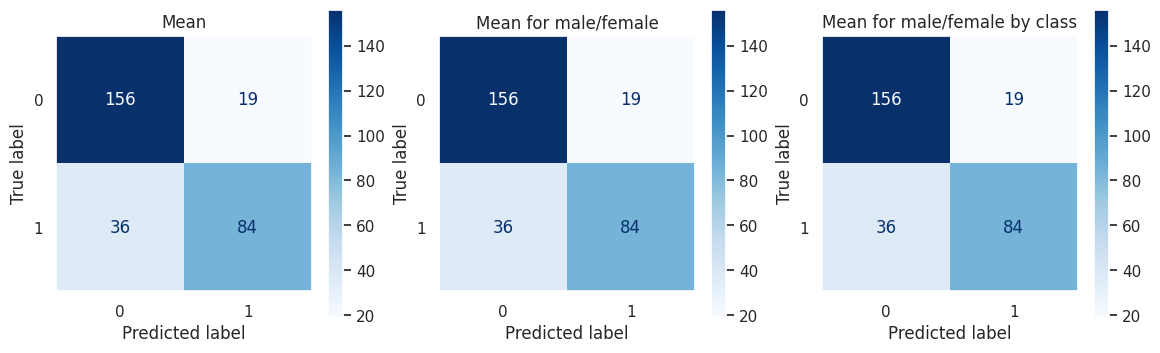

In [68]:
Y_1_pred_svm = model_svm_1.predict(X_1_test)
Y_2_pred_svm = model_svm_2.predict(X_2_test)
Y_3_pred_svm = model_svm_3.predict(X_3_test)

print_conf_matrix(Y_1_test, Y_2_test, Y_3_test, Y_1_pred_svm, Y_2_pred_svm, Y_3_pred_svm)

In [69]:
print_score('SVM', Y_1_test, Y_2_test, Y_3_test, Y_1_pred_svm, Y_2_pred_svm, Y_3_pred_svm)

Mean
SVM Accuracy:  0.8135593220338984
SVM Precision: 0.8155339805825242
SVM Recall:    0.7
SVM ROC AUC:   0.7957142857142857
SVM LogLoss:   6.720003174242181

Mean for male/female
SVM Accuracy:  0.8135593220338984
SVM Precision: 0.8155339805825242
SVM Recall:    0.7
SVM ROC AUC:   0.7957142857142857
SVM LogLoss:   6.720003174242181

Mean for male/female by class
SVM Accuracy:  0.8135593220338984
SVM Precision: 0.8155339805825242
SVM Recall:    0.7
SVM ROC AUC:   0.7957142857142857
SVM LogLoss:   6.720003174242181


### Логистическая регрессия

In [70]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'tol': [0.0001, 0.00001, 0.000001]}

model_lr_1 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)
model_lr_2 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)
model_lr_3 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)

model_lr_1.fit(X_1_train, Y_1_train.values.ravel())
model_lr_2.fit(X_2_train, Y_2_train.values.ravel())
model_lr_3.fit(X_3_train, Y_3_train.values.ravel())

print('Best params for model 1: ', model_lr_1.best_params_)
print('Best params for model 2: ', model_lr_2.best_params_)
print('Best params for model 3: ', model_lr_3.best_params_)

Best params for model 1:  {'C': 1, 'penalty': 'l2', 'tol': 0.0001}
Best params for model 2:  {'C': 1, 'penalty': 'l2', 'tol': 0.0001}
Best params for model 3:  {'C': 1, 'penalty': 'l2', 'tol': 0.0001}


In [71]:
C_lr_1 = model_lr_1.best_params_['C']
penalty_lr_1 = model_lr_1.best_params_['penalty']
tol_lr_1 = model_lr_1.best_params_['tol']

C_lr_2 = model_lr_2.best_params_['C']
penalty_lr_2 = model_lr_2.best_params_['penalty']
tol_lr_2 = model_lr_2.best_params_['tol']

C_lr_3 = model_lr_3.best_params_['C']
penalty_lr_3 = model_lr_3.best_params_['penalty']
tol_lr_3 = model_lr_3.best_params_['tol']

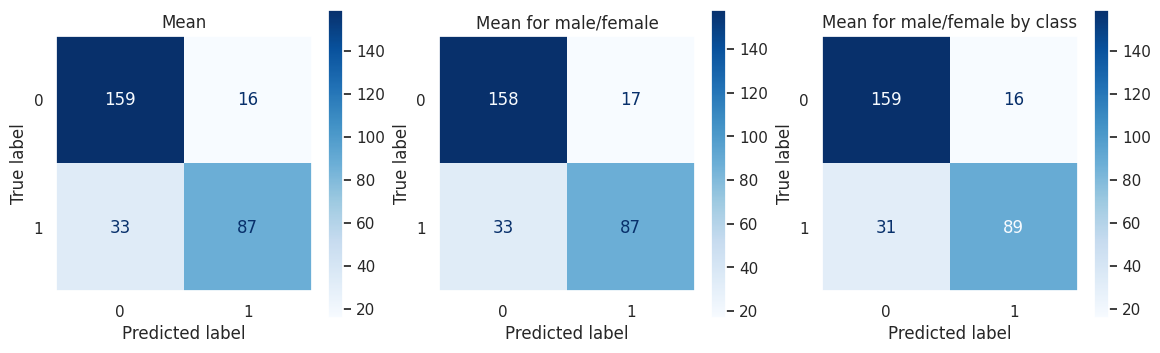

In [72]:
Y_1_pred_lr = model_lr_1.predict(X_1_test)
Y_2_pred_lr = model_lr_2.predict(X_2_test)
Y_3_pred_lr = model_lr_3.predict(X_3_test)

print_conf_matrix(Y_1_test, Y_2_test, Y_3_test, Y_1_pred_lr, Y_2_pred_lr, Y_3_pred_lr)

In [73]:
print_score('Logistic Regression', Y_1_test, Y_2_test, Y_3_test, Y_1_pred_lr, Y_2_pred_lr, Y_3_pred_lr)

Mean
Logistic Regression Accuracy:  0.8338983050847457
Logistic Regression Precision: 0.8446601941747572
Logistic Regression Recall:    0.725
Logistic Regression ROC AUC:   0.8167857142857143
Logistic Regression LogLoss:   5.986911918870306

Mean for male/female
Logistic Regression Accuracy:  0.8305084745762712
Logistic Regression Precision: 0.8365384615384616
Logistic Regression Recall:    0.725
Logistic Regression ROC AUC:   0.8139285714285714
Logistic Regression LogLoss:   6.109093794765619

Mean for male/female by class
Logistic Regression Accuracy:  0.8406779661016949
Logistic Regression Precision: 0.8476190476190476
Logistic Regression Recall:    0.7416666666666667
Logistic Regression ROC AUC:   0.8251190476190476
Logistic Regression LogLoss:   5.742548167079682


### Метод k ближайших соседей

In [74]:
from sklearn.neighbors import KNeighborsClassifier


from sklearn.linear_model import LogisticRegression

param_grid = {'n_neighbors': [6, 7, 8, 9],
              'metric': ['minkowski', 'chebyshev', 'cosine'],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

model_knn_1 = GridSearchCV(KNeighborsClassifier(), param_grid)
model_knn_2 = GridSearchCV(KNeighborsClassifier(), param_grid)
model_knn_3 = GridSearchCV(KNeighborsClassifier(), param_grid)

model_knn_1.fit(X_1_train, Y_1_train.values.ravel())
model_knn_2.fit(X_2_train, Y_2_train.values.ravel())
model_knn_3.fit(X_3_train, Y_3_train.values.ravel())

print('Best params for model 1: ', model_knn_1.best_params_)
print('Best params for model 2: ', model_knn_2.best_params_)
print('Best params for model 3: ', model_knn_3.best_params_)

Best params for model 1:  {'metric': 'minkowski', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best params for model 2:  {'metric': 'minkowski', 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Best params for model 3:  {'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [75]:
neighb_knn_1 = model_knn_1.best_params_['n_neighbors']
metric_knn_1 = model_knn_1.best_params_['metric']
weights_knn_1 = model_knn_1.best_params_['weights']
p_knn_1 = model_knn_1.best_params_['p']

neighb_knn_2 = model_knn_2.best_params_['n_neighbors']
metric_knn_2 = model_knn_2.best_params_['metric']
weights_knn_2 = model_knn_2.best_params_['weights']
p_knn_2 = model_knn_2.best_params_['p']

neighb_knn_3 = model_knn_3.best_params_['n_neighbors']
metric_knn_3 = model_knn_3.best_params_['metric']
weights_knn_3 = model_knn_3.best_params_['weights']
p_knn_3 = model_knn_3.best_params_['p']

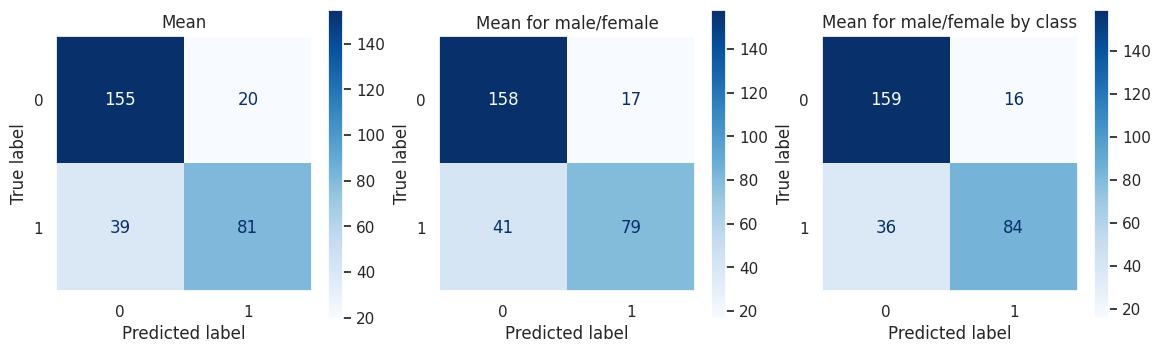

In [76]:
Y_1_pred_knn = model_knn_1.predict(X_1_test)
Y_2_pred_knn = model_knn_2.predict(X_2_test)
Y_3_pred_knn = model_knn_3.predict(X_3_test)

print_conf_matrix(Y_1_test, Y_2_test, Y_3_test, Y_1_pred_knn, Y_2_pred_knn, Y_3_pred_knn)

In [77]:
print_score('KNN', Y_1_test, Y_2_test, Y_3_test, Y_1_pred_knn, Y_2_pred_knn, Y_3_pred_knn)

Mean
KNN Accuracy:  0.8
KNN Precision: 0.801980198019802
KNN Recall:    0.675
KNN ROC AUC:   0.7803571428571429
KNN LogLoss:   7.2087306778234295

Mean for male/female
KNN Accuracy:  0.8033898305084746
KNN Precision: 0.8229166666666666
KNN Recall:    0.6583333333333333
KNN ROC AUC:   0.780595238095238
KNN LogLoss:   7.086548801928118

Mean for male/female by class
KNN Accuracy:  0.823728813559322
KNN Precision: 0.84
KNN Recall:    0.7
KNN ROC AUC:   0.8042857142857143
KNN LogLoss:   6.353457546556243


### Сравнение моделей

In [78]:
svm_accuracy_score = []
lr_accuracy_score  = []
knn_accuracy_score = []

N = 10

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y_1.values.ravel(), test_size=0.33, random_state=42)
    model = svm.LinearSVC(C=C_svm_1, penalty=penalty_svm_1)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    svm_accuracy_score.append(accuracy_score(Y_test, Y_pred))
    model = LogisticRegression(C=C_lr_1, penalty=penalty_lr_1, tol=tol_lr_1)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    lr_accuracy_score.append(accuracy_score(Y_test, Y_pred))
    model = KNeighborsClassifier(n_neighbors=neighb_knn_1, metric=metric_knn_1, weights=weights_knn_1, p=p_knn_1)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    knn_accuracy_score.append(accuracy_score(Y_test, Y_pred))


print(svm_accuracy_score)
print(lr_accuracy_score)
print(knn_accuracy_score)

[0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984]
[0.8338983050847457, 0.8338983050847457, 0.8338983050847457, 0.8338983050847457, 0.8338983050847457, 0.8338983050847457, 0.8338983050847457, 0.8338983050847457, 0.8338983050847457, 0.8338983050847457]
[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]


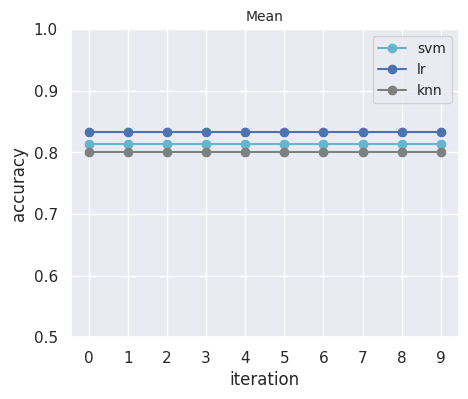

In [79]:
iter_accuracy_graph('Mean', svm_accuracy_score, lr_accuracy_score, knn_accuracy_score)

In [80]:
svm_accuracy_score = []
lr_accuracy_score  = []
knn_accuracy_score = []

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2.values.ravel(), test_size=0.33, random_state=42)
    model = svm.LinearSVC(C=C_svm_2, penalty=penalty_svm_2)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    svm_accuracy_score.append(accuracy_score(Y_test, Y_pred))
    model = LogisticRegression(C=C_lr_2, penalty=penalty_lr_2, tol=tol_lr_2)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    lr_accuracy_score.append(accuracy_score(Y_test, Y_pred))
    model = KNeighborsClassifier(n_neighbors=neighb_knn_2, metric=metric_knn_2, weights=weights_knn_2, p=p_knn_2)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    knn_accuracy_score.append(accuracy_score(Y_test, Y_pred))

print(svm_accuracy_score)
print(lr_accuracy_score)
print(knn_accuracy_score)

[0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984]
[0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712]
[0.8033898305084746, 0.8033898305084746, 0.8033898305084746, 0.8033898305084746, 0.8033898305084746, 0.8033898305084746, 0.8033898305084746, 0.8033898305084746, 0.8033898305084746, 0.8033898305084746]


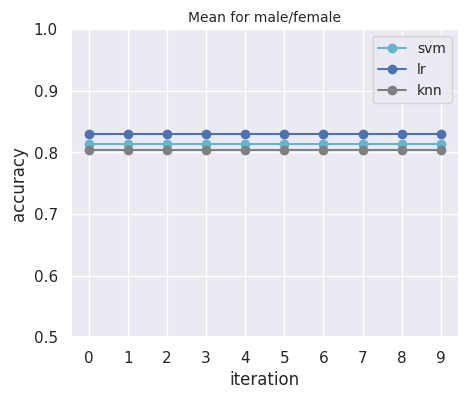

In [81]:
iter_accuracy_graph('Mean for male/female', svm_accuracy_score, lr_accuracy_score, knn_accuracy_score)

In [82]:
svm_accuracy_score = []
lr_accuracy_score  = []
knn_accuracy_score = []

for i in range(N):
    X_train, X_test, Y_train, Y_test = train_test_split(X_3, Y_3.values.ravel(), test_size=0.33, random_state=42)
    model = svm.LinearSVC(C=C_svm_3, penalty=penalty_svm_3)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    svm_accuracy_score.append(accuracy_score(Y_test, Y_pred))
    model = LogisticRegression(C=C_lr_2, penalty=penalty_lr_2, tol=tol_lr_2)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    lr_accuracy_score.append(accuracy_score(Y_test, Y_pred))
    model = KNeighborsClassifier(n_neighbors=neighb_knn_3, metric=metric_knn_3, weights=weights_knn_3, p=p_knn_3)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    knn_accuracy_score.append(accuracy_score(Y_test, Y_pred))

print(svm_accuracy_score)
print(lr_accuracy_score)
print(knn_accuracy_score)

[0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984, 0.8135593220338984]
[0.8406779661016949, 0.8406779661016949, 0.8406779661016949, 0.8406779661016949, 0.8406779661016949, 0.8406779661016949, 0.8406779661016949, 0.8406779661016949, 0.8406779661016949, 0.8406779661016949]
[0.823728813559322, 0.823728813559322, 0.823728813559322, 0.823728813559322, 0.823728813559322, 0.823728813559322, 0.823728813559322, 0.823728813559322, 0.823728813559322, 0.823728813559322]


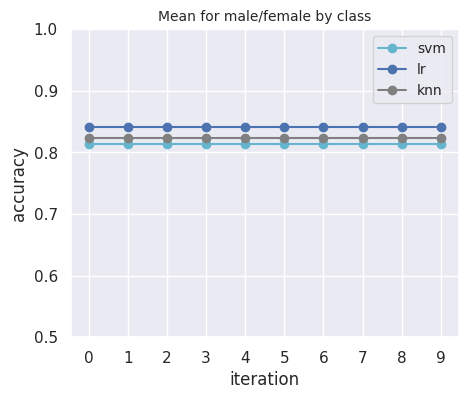

In [83]:
iter_accuracy_graph('Mean for male/female by class', svm_accuracy_score, lr_accuracy_score, knn_accuracy_score)